# Imports

In [70]:
#Library Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import pandas_profiling

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import kneighbors_graph
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [71]:
# Data Import
df = pd.read_csv('landslides.csv' , comment="#")
df['event_date'] = pd.to_datetime(df['event_date'])
df['submitted_date'] = pd.to_datetime(df['submitted_date'])
df['created_date'] = pd.to_datetime(df['created_date'])
df['last_edited_date'] = pd.to_datetime(df['last_edited_date'])


# Data Cleaning

In [72]:
# The unnecessary columns of the dataset are filtered from the featureset
# Null values are set to 0 or removed from the dataset.

featureset = df[["landslide_category","landslide_trigger","landslide_size", 
         "landslide_setting", "fatality_count", "injury_count"]]
featureset = featureset.fillna(0)

x = featureset[["landslide_category","landslide_trigger","landslide_size", "landslide_setting", "injury_count"]]
y = featureset["fatality_count"]

num_entries = len(df)
num_nans = featureset['injury_count'].count()
num_entries = len(df)


In [73]:
#df.profile_report()

In [74]:
x = x.astype(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)
x_test


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [75]:
#As we have categorical data, this function encodes each string category
# with a number to be used in various ML algorithms.
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(x)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

X_train_enc, X_test_enc = prepare_inputs(x_train, x_test)
X_train_enc
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(x)

array([[ 6., 16.,  3.,  5.,  0.],
       [ 6., 13.,  4.,  3.,  0.],
       [ 7.,  4.,  2.,  3.,  0.],
       ...,
       [ 6.,  4.,  3., 13.,  0.],
       [ 7., 13.,  4., 13.,  0.],
       [ 6., 13.,  3.,  9.,  0.]])

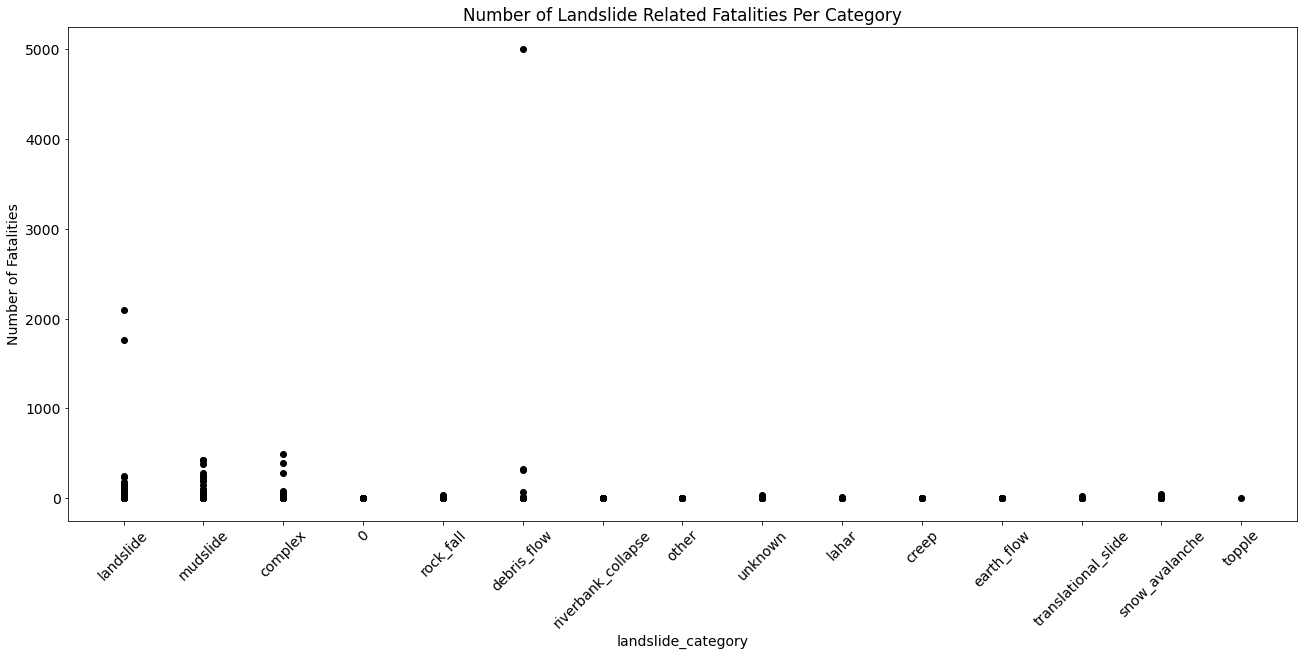

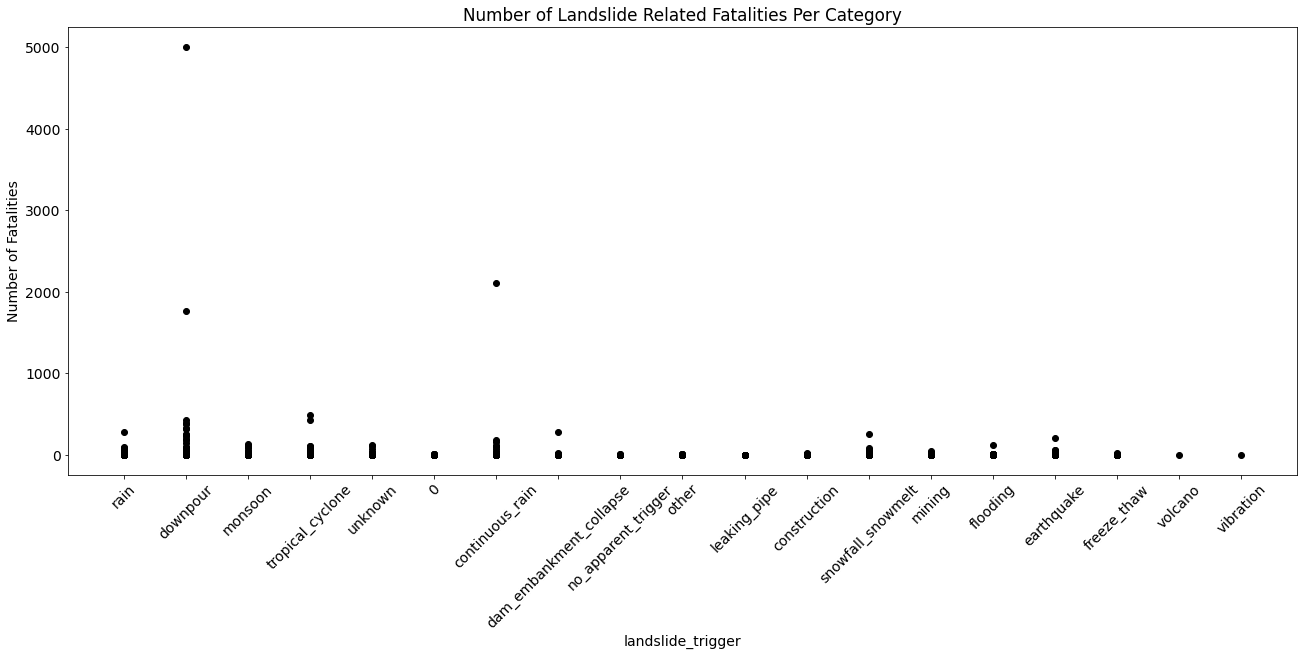

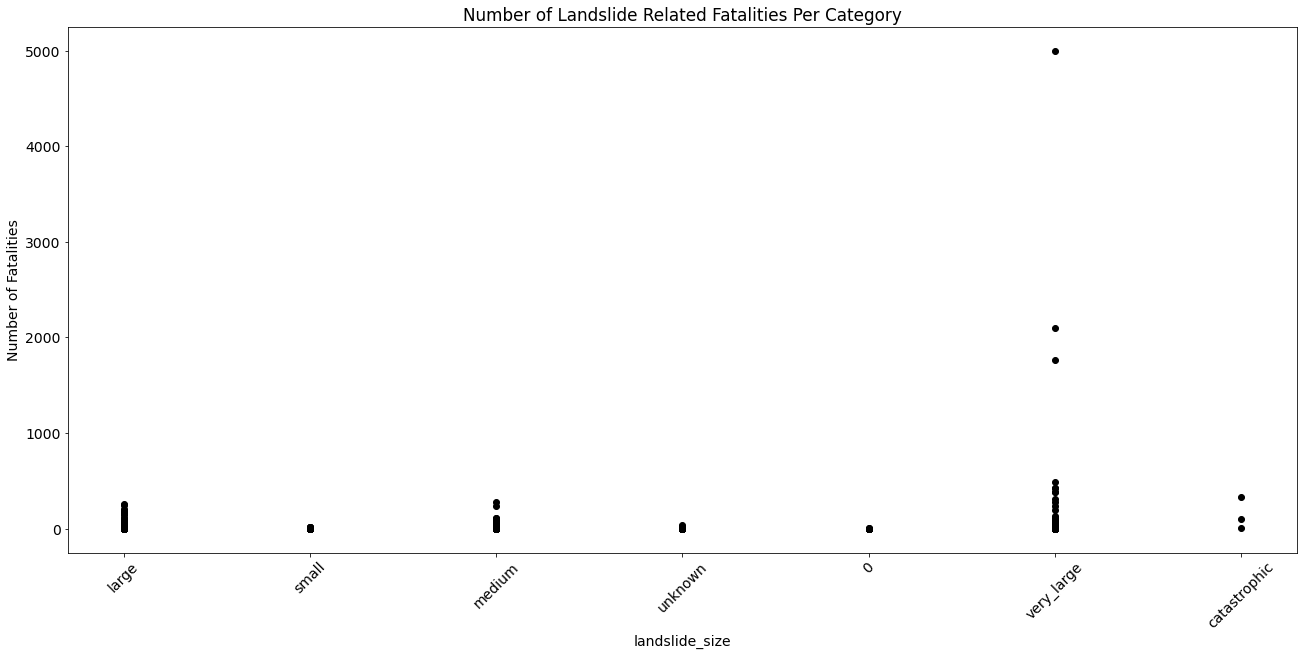

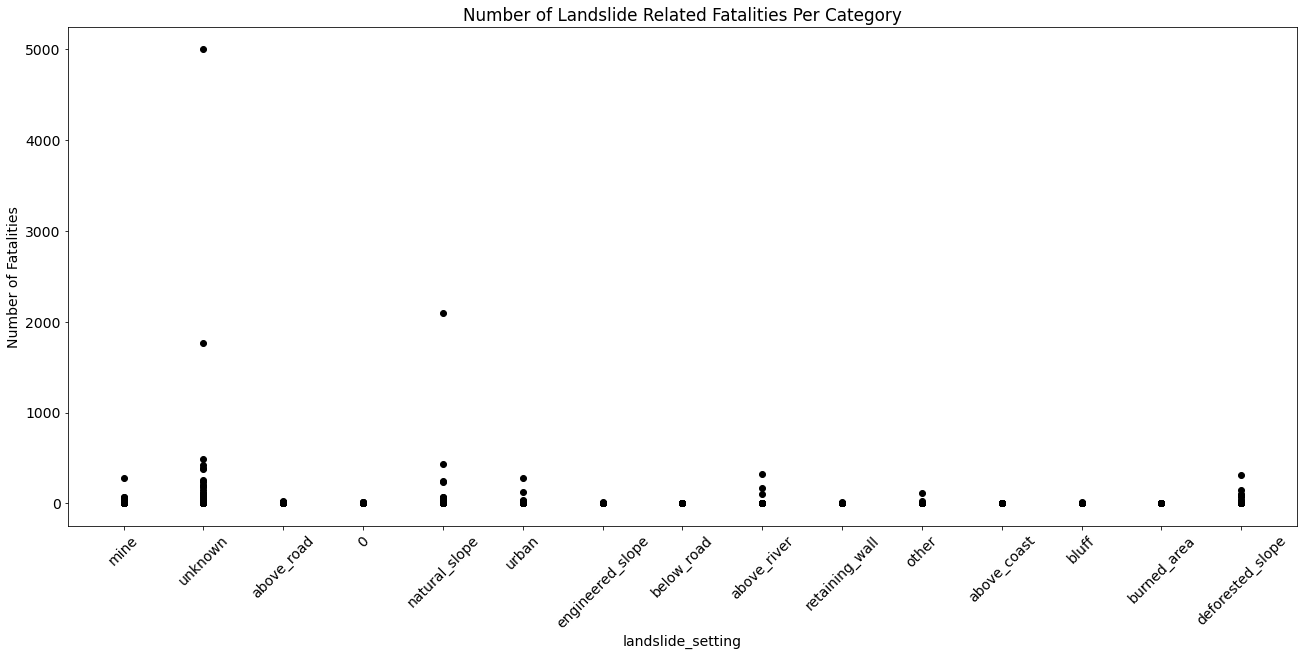

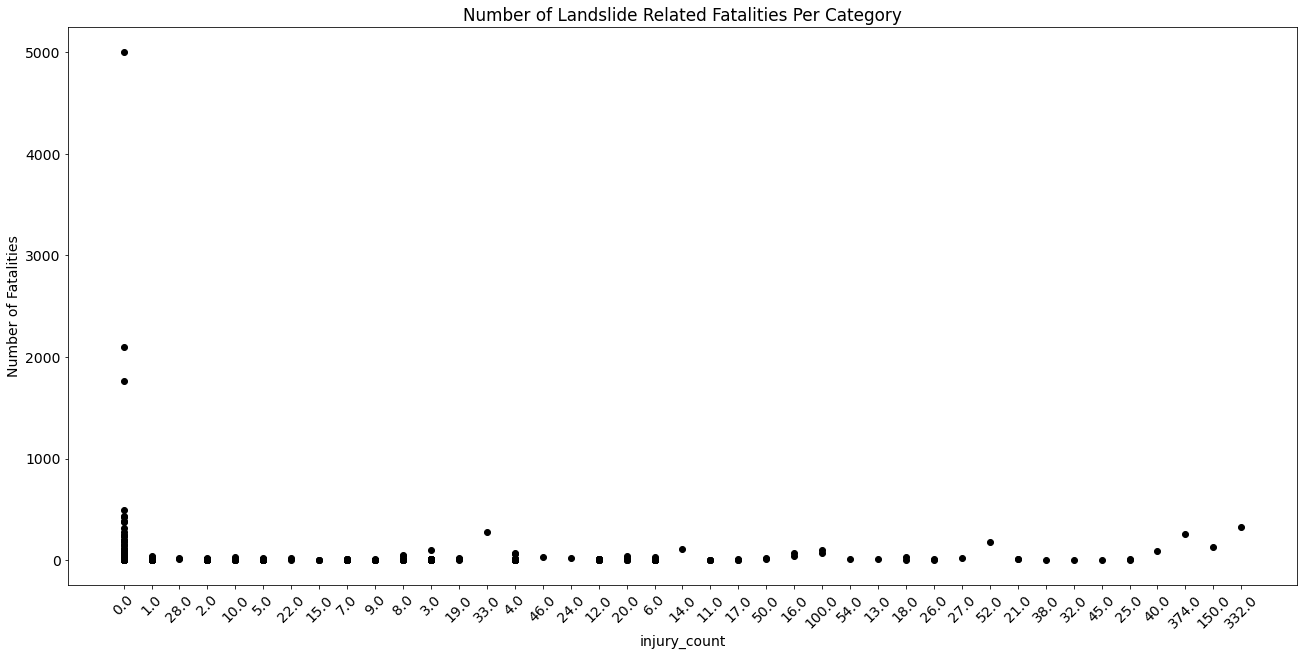

In [76]:
i = 0
for col in  x.columns:
    
    plt.figure(figsize=(18, 9))
    plt.rc("font", size=14)
    #plt.scatter(X_train_enc[:,1], y_pred, color="black")
    plt.scatter(x.iloc[:,i], y, color="black")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel("Number of Fatalities")
    plt.title("Number of Landslide Related Fatalities Per Category")
    i = i + 1



In [77]:
# Creating regression model to predict number of fatalities

lm = linear_model.LinearRegression(normalize = True)
model = lm.fit(X_train_enc,y_train)
y_pred = model.predict(X_test_enc)
print("Model Parameters are: \n")
i = 0
for col in x.columns:
    print(col, ": ", lm.coef_[i])
    i+=1

Model Parameters are: 

landslide_category :  -1.9117724985781401
landslide_trigger :  -0.35289461595694954
landslide_size :  5.496789498589644
landslide_setting :  0.40347979523128197
injury_count :  0.233287279193206


array([4, 3, 3, ..., 4, 3, 0], dtype=int8)

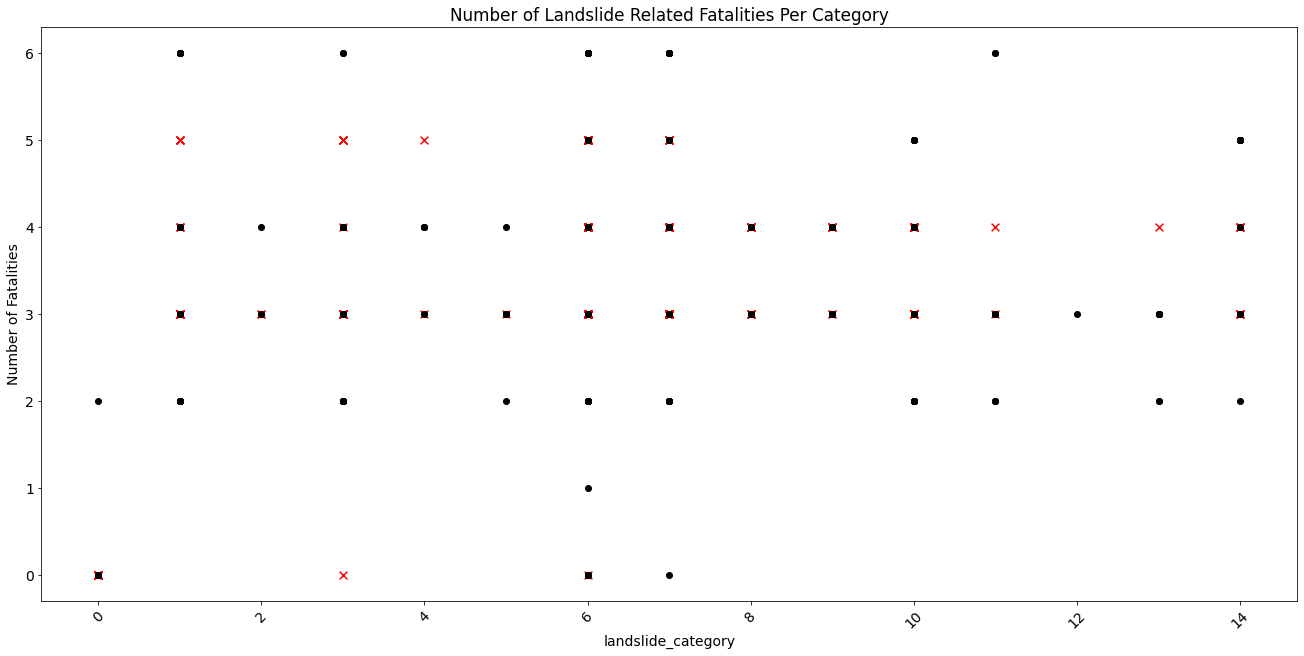

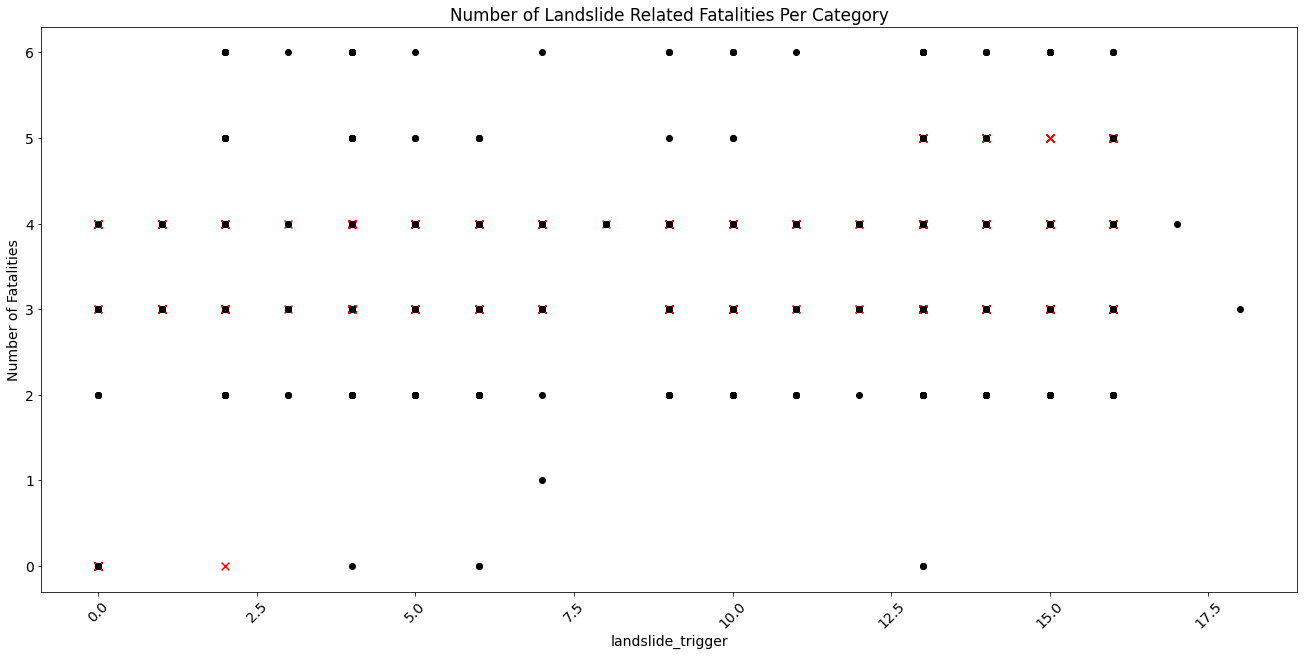

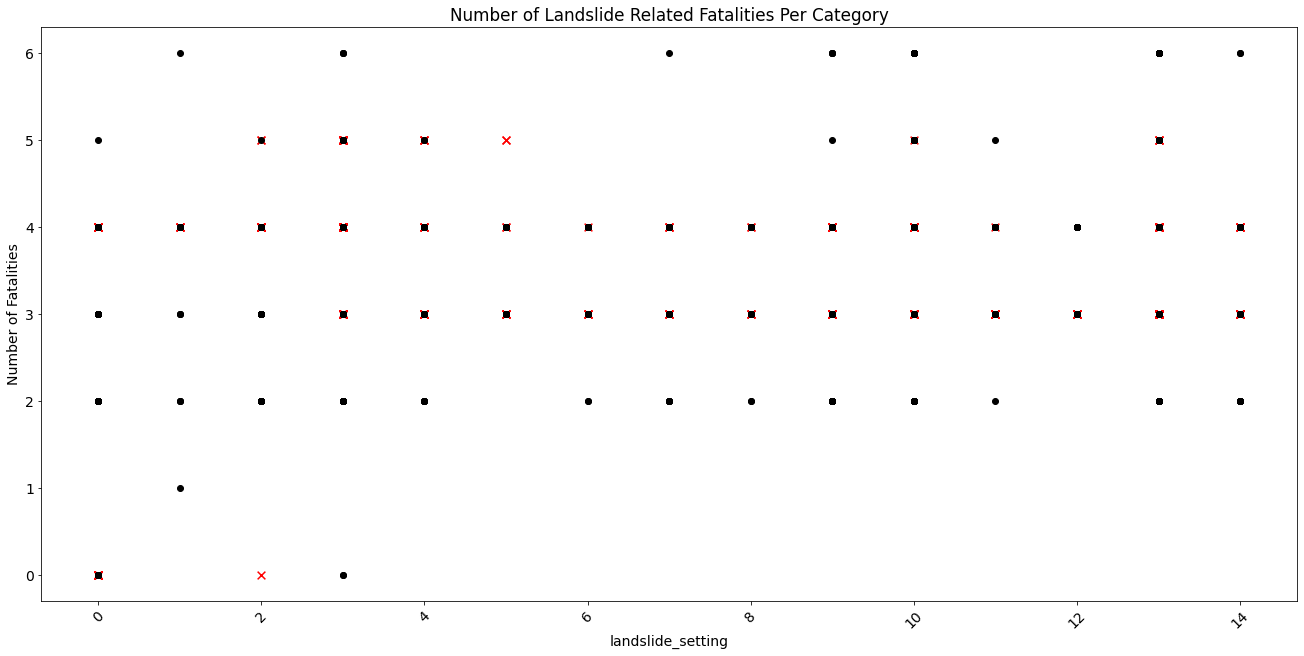

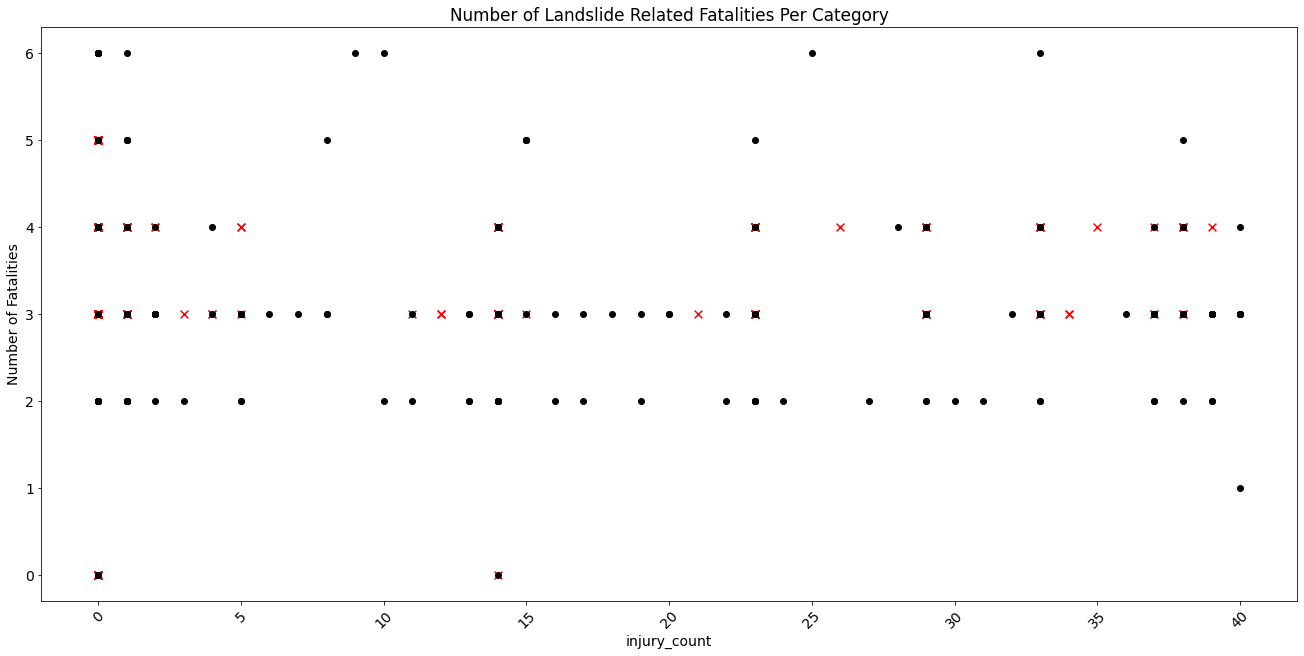

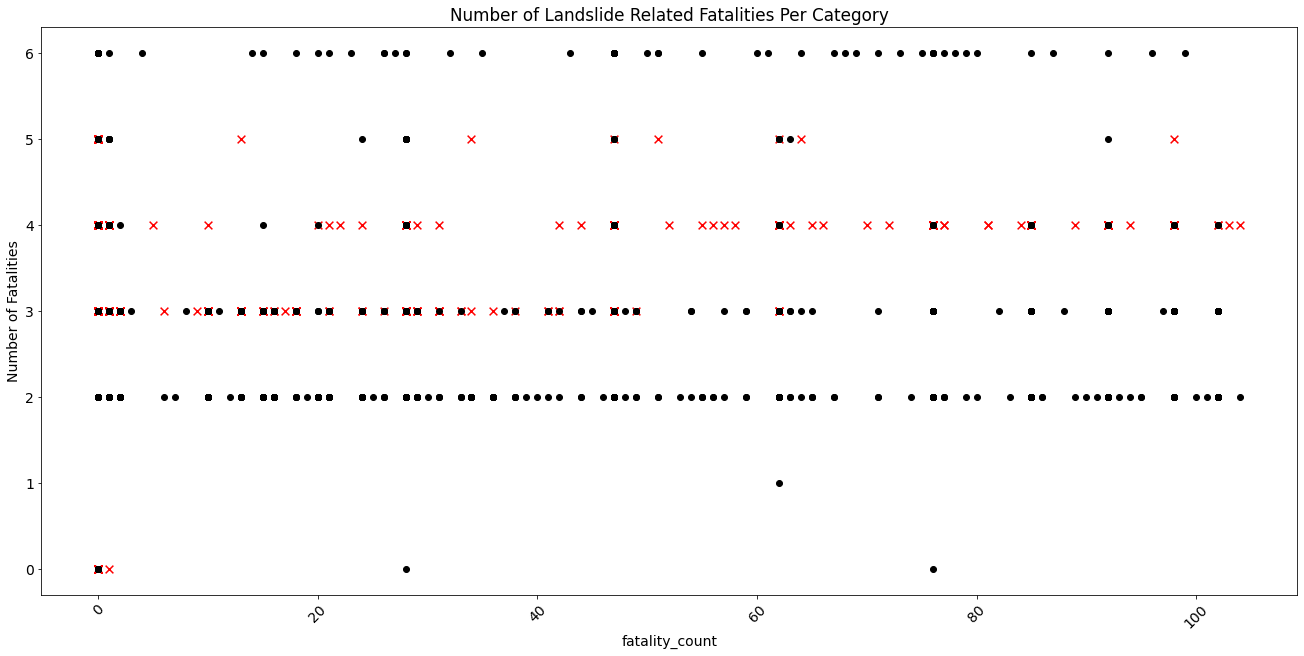

In [89]:
# Visualisation of fatality predictions across different variables
i = 0
for col in  x.columns:
    
    plt.figure(figsize=(18, 9))
    plt.rc("font", size=14)
    #plt.scatter(X_train_enc[:,1], y_pred, color="black")
    plt.scatter(X_test_enc[:,i], y_pred, color="red", marker = 'x', s= 60)
    plt.scatter(X_train_enc[:,i], y_train, color="black")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel("Number of Fatalities")
    plt.title("Number of Landslide Related Fatalities Per Category")
    i = i + 1

y_pred

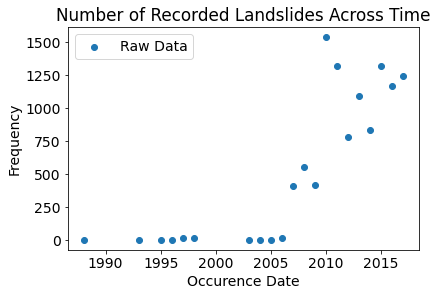

In [90]:
df['Number'] =1
df['Year'] = df['event_date'].dt.year
featureset_ = df.groupby(['Year'], as_index=False).sum()

from mlxtend.plotting import plot_decision_regions


x = df['Year']

fig = plt.figure()
plt.xlabel("Occurence Date") 
plt.ylabel("Frequency")
plt.title("Number of Recorded Landslides Across Time")
plt.scatter(featureset_['Year'], featureset_['Number'], label = "Raw Data")
#plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()


In [91]:
#Categorising landslide size

#As we have categorical data, this function encodes each string category
# with a number to be used in various ML algorithms.

x = featureset[["landslide_category","landslide_trigger", "landslide_setting", "injury_count","fatality_count"]]

y = featureset["landslide_size"]
y = y.astype('category')
y = y.cat.codes

x = x.astype(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(x)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

X_train_enc, X_test_enc = prepare_inputs(x_train, x_test)
y_train

7274     3
10352    4
1638     2
3141     3
9019     2
        ..
1099     3
2514     3
6637     3
2575     4
7336     3
Length: 8825, dtype: int8

In [81]:
df1 = pd.DataFrame(data=y, columns=['Category'])
df1['count'] = 1
df1 = df1.groupby(['Category']).sum()
df1


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [82]:
# generate logistic regression model
C = 1
alpha = 1/ (2*C)
model = LogisticRegression(C= alpha)
# fit model to training set.
model.fit(X_train_enc,y_train)
#use model set to predict y values on test set.
y_pred=model.predict(X_test_enc)
print(model.coef_, model.intercept_)
coefs = model.coef_
inter = model.intercept_
# formula for decision boundary line.
y_pred

[[-0.36399094 -0.24829145 -0.80693065 -0.02949822  0.04659267]
 [-0.54406481 -0.4695803  -0.56650923  0.36126601 -0.27422657]
 [ 0.2409879   0.04843325  0.36905264 -0.05188383  0.06130058]
 [ 0.34761895  0.05326058  0.41663829 -0.04932757  0.04573624]
 [ 0.51244538  0.06821438  0.29665378 -0.0608406   0.0165148 ]
 [-0.14115571  0.46949699 -0.04501795 -0.09518959  0.03857433]
 [-0.05184077  0.07846654  0.33611312 -0.0745262   0.06550794]] [ 4.44289874 -0.81996297 -1.02982606  0.19433882 -0.58195259 -1.1837105
 -1.02178544]


/Users/adammcquade/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([3, 3, 3, ..., 3, 3, 0], dtype=int8)

Accuracy: 0.6778432260987767
Precision: 0.6162517901413198
Recall: 0.6778432260987767


/Users/adammcquade/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


0        2
1        4
2        2
3        3
4        3
        ..
11027    3
11028    4
11029    4
11030    2
11031    4
Length: 11032, dtype: int8

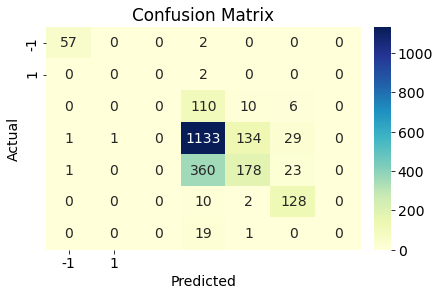

In [83]:
# CODE FOR CONFUSION MATRIX SOURCED FROM:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

class_names=[-1, 1]
tick_marks = [-1, 1]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g', 
            yticklabels=tick_marks, xticklabels = tick_marks)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average = 'weighted'))
y

In [84]:
#Categorising landslide size

#As we have categorical data, this function encodes each string category
# with a number to be used in various ML algorithms.

x = featureset[["landslide_category","landslide_trigger", "landslide_setting", "injury_count","fatality_count"]]

y = featureset["landslide_size"]
y = y.astype('category')
y = y.cat.codes

x = x.astype(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)


X_train_enc, X_test_enc = prepare_inputs(x_train, x_test)


# penalty paramter c is altered to visualise the effect on the model.
c = 1
# generate supprt vector classifier and fit to training data.
clf = svm.LinearSVC(C = c, max_iter=10000)
clf.fit(X_train_enc,y_train)
svm = LinearSVC(C = c)
svm.fit(X_train_enc, y_train)

# use trained model to predict y-values.
y_pred = svm.predict(X_test_enc)
print(svm.coef_)
print(svm.intercept_)

/Users/adammcquade/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:Liblinear failed to converge, increase the number of iterations.


[[-1.75434309e-01 -6.01486809e-02 -3.89339879e-01  1.07294370e-02
  -1.11017449e-02]
 [-1.25328177e-01 -3.20164734e-02 -2.75677458e-01  4.49885865e-02
   2.16649441e-03]
 [ 4.20186011e-03 -4.17251889e-03  2.31062055e-03  7.88364661e-03
  -2.27385305e-03]
 [ 3.32514488e-02 -1.48896219e-02  7.91618539e-02 -5.15165379e-03
  -1.96209147e-02]
 [ 1.00773076e-01 -1.04885850e-02 -2.96454811e-02  3.27798678e-03
   1.97572745e-03]
 [-1.46855076e-01  1.62320505e-01 -8.91540376e-02 -1.83449267e-02
   7.04761555e-04]
 [-9.88656331e-04  4.32497836e-04  1.00876901e-03 -1.38257680e-04
  -4.35519889e-06]]
[ 0.98375104 -0.99829041 -0.9356442  -0.67273855 -0.78882235 -1.50508719
 -0.99967932]


/Users/adammcquade/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:Liblinear failed to converge, increase the number of iterations.


Accuracy: 0.6289080199365654
Precision: 0.577894526584007
Recall: 0.6289080199365654


/Users/adammcquade/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


0        2
1        4
2        2
3        3
4        3
        ..
11027    3
11028    4
11029    4
11030    2
11031    4
Length: 11032, dtype: int8

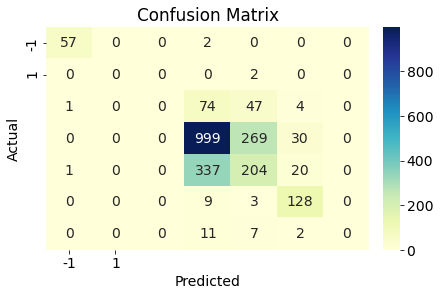

In [85]:
# CODE FOR CONFUSION MATRIX SOURCED FROM:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

class_names=[-1, 1]
tick_marks = [-1, 1]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g', 
            yticklabels=tick_marks, xticklabels = tick_marks)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average = 'weighted'))
y
